In [13]:
import numpy as np
import pandas  as pd

In [28]:
pew=pd.read_csv('I:\\Text Datasets\\CSV\\pew.csv')
df=pd.read_csv('I:\\Text Datasets\\CSV\\drinks.csv')

In [19]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [39]:
pd.melt(pew,id_vars='religion',var_name='OBJECT',value_name='INTEGER').head()


,religion,OBJECT,INTEGER
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [56]:
billboard=pd.read_csv('I:\\Text Datasets\\CSV\\billboard.csv')
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df=pd.melt(billboard,id_vars=['year','artist','track','time','date.entered'])

In [160]:
ebola=pd.read_csv('I:\\Text Datasets\\CSV\\country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [156]:
ebole=pd.melt(ebola,id_vars=['Date','Day'])

In [165]:
ebole[['First','Second']]=ebole.variable.str.split('_',expand=True)

In [213]:
ebole.to_csv('E:\\nice.csv')

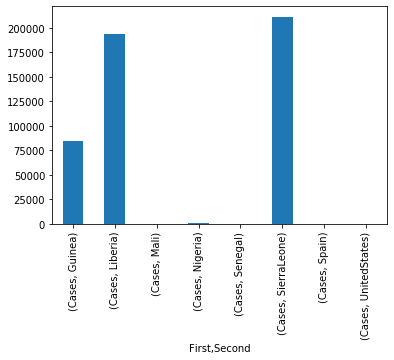

In [198]:
ebole[ebole.First=='Cases'].groupby(['First','Second']).value.sum().plot(kind='bar')

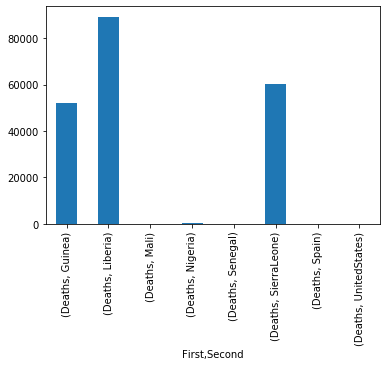

In [199]:
ebole[ebole.First=='Deaths'].groupby(['First','Second']).value.sum().plot(kind='bar')

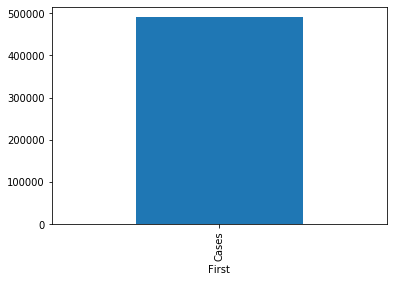

In [200]:
ebole[ebole.First=='Cases'].groupby(['First']).value.sum().plot(kind='bar')

In [235]:
ebole.pivot_table(index=['Date','Second'],columns=['First'],values='value',dropna=True).head()

First                  Cases  Deaths
Date     Second                     
1/2/2015 Liberia      8157.0  3496.0
1/3/2015 Guinea       2769.0  1767.0
         Liberia      8166.0  3496.0
         SierraLeone  9722.0  2915.0
1/4/2015 Guinea       2775.0  1781.0

In [236]:
ebole['id']=range(ebole.shape[0])

In [240]:
power=ebole.drop(['Day','variable'],axis=1)

In [244]:
power.head()

,Date,value,First,Second,id
0,1/5/2015,2776.0,Cases,Guinea,0
1,1/4/2015,2775.0,Cases,Guinea,1
2,1/3/2015,2769.0,Cases,Guinea,2
3,1/2/2015,NaN,Cases,Guinea,3
4,12/31/2014,2730.0,Cases,Guinea,4


In [251]:
new_df=ebole.loc[:,['Day','variable']]

In [264]:
new_df.shape

(1952, 2)

In [267]:
power.merge(new_df,left_on='value',right_on='Day').head()

,Date,value,First,Second,id,Day,variable
0,5/27/2014,281.0,Cases,Guinea,91,281,Cases_Guinea
1,5/27/2014,281.0,Cases,Guinea,91,281,Cases_Liberia
2,5/27/2014,281.0,Cases,Guinea,91,281,Cases_SierraLeone
3,5/27/2014,281.0,Cases,Guinea,91,281,Cases_Nigeria
4,5/27/2014,281.0,Cases,Guinea,91,281,Cases_Senegal


C:\Users\Programmer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


TypeError: 'int' object is not callable